### Exploring techniques to reduce the dimensionality of the 2012 U.S. Army Anthropometric Survey (ANSUR-2)

In [1]:
# Package imports
%matplotlib inline
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import os
os.chdir('C:/Users/jackj/OneDrive/Documents/MSc/ML2/tutorial 2')

In [2]:
# Read the dataset
df_full = pd.read_csv('ANSUR_II_FEMALE_Public.csv')

In [3]:
# Select random variables to compare
chosen_var = ['headbreadth',
         'headcircumference',
         'headlength',
         'balloffootcircumference',
         'balloffootlength',
         'footbreadthhorizontal',
         'footlength',
         'buttockcircumference',
         'buttockdepth',
         'buttockheight',
         'earprotrusion',
        'earbreadth',
             'earlength',
             'forearmcenterofgriplength',
             'forearmcircumferenceflexed',
             'forearmforearmbreadth',
             'forearmhandlength']

df = df_full[chosen_var]

In [4]:
# Check dataset
df.head(7)

,headbreadth,headcircumference,headlength,balloffootcircumference,balloffootlength,footbreadthhorizontal,footlength,buttockcircumference,buttockdepth,buttockheight,earprotrusion,earbreadth,earlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength
0,141,548,191,222,177,91,246,1011,223,836,16,35,65,316,265,517,432
1,138,535,180,225,178,91,249,893,186,900,23,32,60,341,247,468,463
2,146,588,207,237,196,100,265,987,204,861,26,36,65,343,262,488,469
3,153,593,206,240,188,97,265,1012,253,897,22,38,62,331,309,529,455
4,140,522,181,217,182,88,247,1281,284,811,18,34,65,339,260,596,447
5,146,570,194,229,201,93,270,1085,279,946,15,35,61,358,297,509,491
6,146,582,197,232,172,93,241,1049,238,853,17,33,60,310,267,519,418


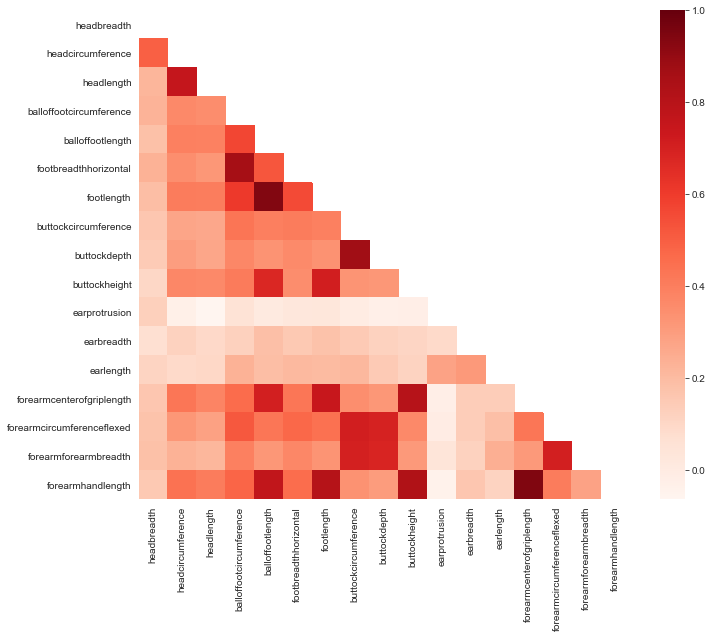

In [5]:
# Quick correlation analysis (mask one corner)
corr_all = df.corr()
f, ax = plt.subplots(figsize = (11, 9))
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_all,cmap="Reds",mask=mask)

In [6]:
# Pick some variables to compare 
X1=np.array(df.headlength.values)
Y1=np.array(df.headcircumference.values)

X2=np.array(df.balloffootlength.values)
Y2=np.array(df.footlength.values)

X3=np.array(df.earprotrusion.values)
Y3=np.array(df.headlength.values)

X4=np.array(df.forearmhandlength.values)
Y4=np.array(df.buttockheight.values)

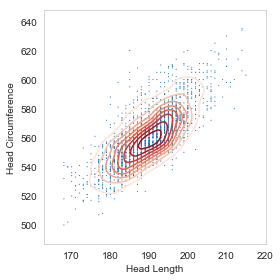

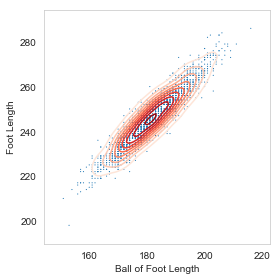

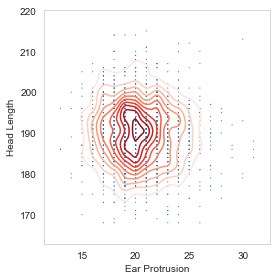

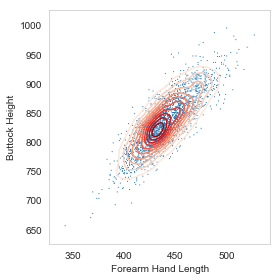

In [7]:
# Create loopable list
Xs = [X1,X2,X3,X4]
X_labels = ['Head Length','Ball of Foot Length','Ear Protrusion','Forearm Hand Length']
Ys = [Y1,Y2,Y3,Y4]
Y_labels = ['Head Circumference','Foot Length','Head Length','Buttock Height']

# Loop through and plot each one
for i in range(4):
    plt.figure(figsize=(4,4))
    plt.scatter(Xs[i],Ys[i],data=df,marker='.',s=5,edgecolors="None")
    sns.kdeplot(Xs[i],Ys[i],cmap="Reds")
    plt.xlabel(X_labels[i])
    plt.ylabel(Y_labels[i])
    plt.tight_layout()

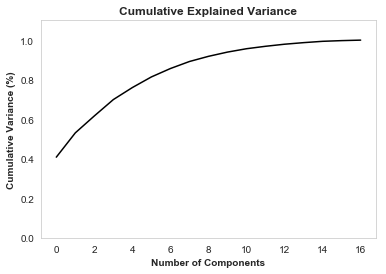

In [8]:
# Standardizing the features
df_std = pd.DataFrame(StandardScaler().fit_transform(df))
df_std.columns = chosen_var

# Fit the PCA
pca = PCA().fit(df_std)
# Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='black')
plt.xlabel('Number of Components',fontweight='bold')
plt.ylabel('Cumulative Variance (%)',fontweight='bold') 
plt.ylim(0,1.1)
plt.title('Cumulative Explained Variance',fontweight='bold')
plt.show()

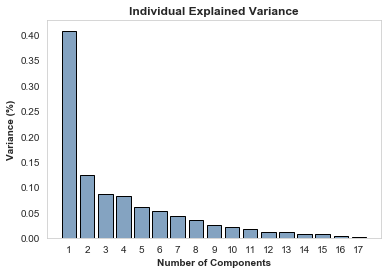

In [9]:
# Fit all 17 components for variance plotting
pca = PCA(n_components=17)
principalComponents = pca.fit_transform(df_std)
principalDf = pd.DataFrame(data = principalComponents)
pca_str = pca.explained_variance_ratio_

# Plot the variance of each PC
plt.bar(np.arange(1,18),pca_str, color=(0.2, 0.4, 0.6, 0.6),edgecolor='black')
plt.xticks(np.arange(1,18))
plt.xlabel('Number of Components',fontweight='bold')
plt.ylabel('Variance (%)',fontweight='bold')
plt.title('Individual Explained Variance',fontweight='bold')
plt.show()


Text(0.5, 1.0, 'Variable Influence on Principle Component 1')

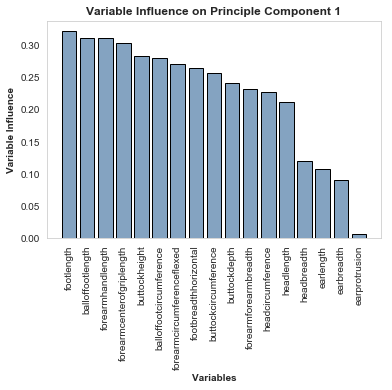

In [10]:
# Create a table of all the feature strengths for each component
all_comps = []
for i in range(17):
    all_comps.append(pca.components_[i])
var_str = pd.DataFrame(all_comps,columns=chosen_var,index=range(1,18)).abs().transpose()

# Check it worked
var_str.head(5)

# Plot the varialbes in PC1
plt.bar(var_str.sort_values(1,ascending=False)[1].keys(),var_str.sort_values(1,ascending=False)[1],color=(0.2, 0.4, 0.6, 0.6),edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel('Variables',fontweight='bold')
plt.ylabel('Variable Influence',fontweight='bold')
plt.title('Variable Influence on Principle Component 1',fontweight='bold')

In [12]:
# Print out the strongest variables for the top 9 PCs
for i in range(1,9):
    print("")
    print("PC "+str(i))
    for j in range(4):
        print(var_str.sort_values(i,ascending=False)[i].keys()[j])


PC 1
footlength
balloffootlength
forearmhandlength
forearmcenterofgriplength

PC 2
buttockdepth
buttockcircumference
forearmforearmbreadth
forearmcircumferenceflexed

PC 3
earprotrusion
headbreadth
earlength
earbreadth

PC 4
headcircumference
headlength
earlength
headbreadth

PC 5
footbreadthhorizontal
balloffootcircumference
earbreadth
buttockheight

PC 6
earbreadth
earprotrusion
headbreadth
footbreadthhorizontal

PC 7
headbreadth
headlength
earbreadth
earlength

PC 8
earlength
earprotrusion
earbreadth
headbreadth


In [13]:
# Calculate BMI (given top 2 PCA features seem to be height/weight related)
bmi = (df_full['Weightlbs'] / df_full['Heightin']**2) * 703

# Biplot, stolen partially from:
# https://stackoverflow.com/questions/50796024/feature-variable-importance-after-a-pca-analysis
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    ax = plt.scatter(xs * scalex,ys * scaley, c = bmi, cmap = 'seismic')
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            butt_count = 0
            butt_distance = [1,1.1,1.15,1.2]
            if "buttock" in labels[i]:
                label_dist = butt_distance[butt_count]
                butt_count += 1
            else:
                label_dist = 1.15
            plt.text(coeff[i,0]* label_dist, coeff[i,1] * label_dist, labels[i], color = 'g', ha = 'center', va = 'center')
            
    return ax

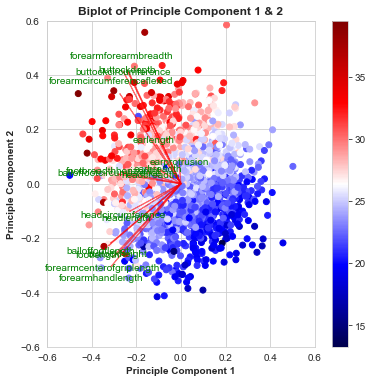

In [19]:
# Refit with 2 components
pca_best = PCA(n_components=2)
best_comps = pca_best.fit_transform(df_std)

# Create the bi-plot for the 2 components
plt.figure(figsize=(6,6))
plt.xlim(-0.6,0.6)
plt.ylim(-0.6,0.6)
plt.xlabel("Principle Component {}".format(1),fontweight='bold')
plt.ylabel("Principle Component {}".format(2),fontweight='bold')
plt.title('Biplot of Principle Component 1 & 2',fontweight='bold')
plt.grid()
#Call the function. Use only the 2 PCs.
ax = myplot(best_comps[:,0:2],np.transpose(pca_best.components_[0:2, :]),chosen_var)
cb = plt.colorbar(ax)
plt.show()

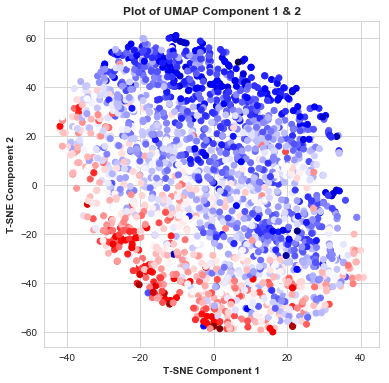

In [21]:
# Try out T-SNE
tsne = TSNE(n_components=2, random_state=0)
tsne_data = tsne.fit_transform(df_std)

# Plot T-SNE
xs = tsne_data[:,0]
ys = tsne_data[:,1]
plt.figure(figsize=(6,6))
plt.xlabel("T-SNE Component {}".format(1),fontweight='bold')
plt.ylabel("T-SNE Component {}".format(2),fontweight='bold')
plt.title('Plot of UMAP Component 1 & 2',fontweight='bold')
plt.grid()
ax = plt.scatter(xs,ys,c=bmi,cmap = 'seismic')

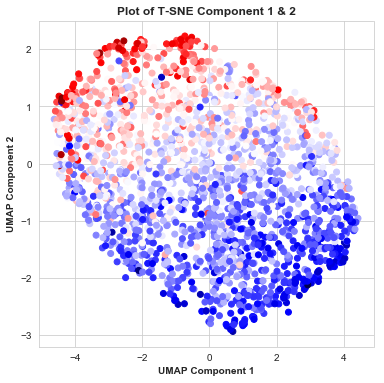

In [20]:
# Try out UMAP
reducer = umap.UMAP()
embedding = reducer.fit_transform(df_std)

# Plot UMAP
xs = embedding[:,0]
ys = embedding[:,1]
plt.figure(figsize=(6,6))
plt.xlabel("UMAP Component {}".format(1),fontweight='bold')
plt.ylabel("UMAP Component {}".format(2),fontweight='bold')
plt.title('Plot of T-SNE Component 1 & 2',fontweight='bold')
plt.grid()
ax = plt.scatter(xs,ys,c=bmi,cmap = 'seismic')